In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from patsy import dmatrices
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost  import CatBoostClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from skompiler import skompile

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv('hmelq.csv')

In [3]:
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
data_ = data.dropna() #remove all null columns' rows in dataset
dms = pd.get_dummies(data_[["reason","job"]])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [6]:
y=data_["value"]
X_=data_.drop(["value","reason","job"], axis=1).astype("float64")
X_.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [7]:
X=pd.concat([X_,dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis=1)
X.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [8]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training=data_.copy()
print("training", training.shape)

X_train (1513, 18)
y_train (1513,)
X_test (505, 18)
y_test (505,)
training (2018, 13)


In [12]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
print(skompile(cart_model.predict).to("python/code"))

(((((((((40 if x[6] <= 59.5099983215332 else ((253 if x[2] <= 16466.0 else 
    151 if x[8] <= 5.5 else 134 if x[1] <= 16500.0 else 71 if x[9] <= 
    15.402999877929688 else 64 if x[2] <= 23482.5 else 78 if x[2] <= 
    32398.0 else 175) if x[12] <= 0.5 else 806 if x[9] <= 26.125 else 708 if
    x[2] <= 70963.5 else 796 if x[2] <= 74053.0 else 694) if x[11] <= 0.5 else
    437) if x[13] <= 0.5 else 65 if x[8] <= 15.5 else 718 if x[9] <= 
    34.457000732421875 else 598 if x[9] <= 34.639503479003906 else 684 if x
    [2] <= 56099.0 else 619 if x[9] <= 35.16200256347656 else 740 if x[1] <=
    17350.0 else 811 if x[1] <= 17650.0 else 681 if x[6] <= 
    76.16500091552734 else 666) if x[7] <= 0.5 else 778 if x[1] <= 7300.0 else
    49 if x[2] <= 44436.0 else 730) if x[4] <= 0.5 else (533 if x[6] <= 
    92.0 else 566) if x[7] <= 0.5 else 561 if x[8] <= 22.5 else 528) if x[5
    ] <= 0.5 else (709 if x[14] <= 0.5 else 35 if x[9] <= 29.5 else 149 if 
    x[11] <= 0.5 else 936) if x[4] <= 1

In [15]:
x=[9]
((0 if x[0] <= 2.5 else 0) if x[0]<= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [16]:
y_pred=cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.0

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

    30809.0       0.00      0.00      0.00         1
    30813.0       0.00      0.00      0.00         1
    31196.0       0.00      0.00      0.00         1
    31531.0       0.00      0.00      0.00         0
    31843.0       0.00      0.00      0.00         0
    31960.0       0.00      0.00      0.00         0
    32559.0       0.00      0.00      0.00         1
    32584.0       0.00      0.00      0.00         0
    33269.0       0.00      0.00      0.00         0
    33353.0       0.00      0.00      0.00         1
    33450.0       0.00      0.00      0.00         1
    36195.0       0.00      0.00      0.00         1
    36811.0       0.00      0.00      0.00         0
    37333.0       0.00      0.00      0.00         0
    37533.0       0.00      0.00      0.00         0
    38311.0       0.00      0.00      0.00         1
    38577.0       0.00      0.00      0.00         1
    39264.0       0.00      0.00      0.00   

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [18]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
cart_grid= {"max_depth": range(1,10), "min_samples_split": list(range(2,50))}

In [24]:
from sklearn.model_selection import GridSearchCV
cart=DecisionTreeClassifier()
cart_cv=GridSearchCV(cart, cart_grid, cv=2, n_jobs=-1, verbose=2)
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 849 out of 864 | elapsed:   16.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   16.4s finished


In [25]:
print("En iyi parametreler: "+ str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 4}


In [26]:
cart= DecisionTreeClassifier(max_depth=4, min_samples_split=4)
cart_tuned=cart.fit(X_train, y_train)

In [27]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.0

In [28]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

    23031.0       0.00      0.00      0.00         0
    26140.0       0.00      0.00      0.00         0
    27781.0       0.00      0.00      0.00         0
    30809.0       0.00      0.00      0.00         1
    30813.0       0.00      0.00      0.00         1
    31196.0       0.00      0.00      0.00         1
    32559.0       0.00      0.00      0.00         1
    33353.0       0.00      0.00      0.00         1
    33450.0       0.00      0.00      0.00         1
    35184.0       0.00      0.00      0.00         0
    36195.0       0.00      0.00      0.00         1
    38311.0       0.00      0.00      0.00         1
    38577.0       0.00      0.00      0.00         1
    39264.0       0.00      0.00      0.00         1
    39293.0       0.00      0.00      0.00         1
    39907.0       0.00      0.00      0.00         1
    40356.0       0.00      0.00      0.00         1
    40754.0       0.00      0.00      0.00   

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


RANDOM FOREST

In [29]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)
training=data_.copy()
print("training", training.shape)

X_train (1513, 18)
y_train (1513,)
X_test (505, 18)
y_test (505,)
training (2018, 13)


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.0

In [32]:
rf_model=RandomForestClassifier()
rf_params={"max_depth":[2,5,8,10], "max_features":[2,5,8], "n_estimators": [10,500,1000], "min_samples_split":[2,5,10]}

In [33]:
rf_model=RandomForestClassifier()
rf_cv_model= GridSearchCV(rf_model, rf_params, cv=2, n_jobs=-1, verbose=5)

In [34]:
rf_cv_model.fit(X_train,y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8], 'n_estimators': [10, 500, 1000], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [35]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 2, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [36]:
rf_tuned=RandomForestClassifier(max_depth=2, max_features=5, min_samples_split= 2, n_estimators= 500)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.0

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

    23031.0       0.00      0.00      0.00         0
    26140.0       0.00      0.00      0.00         0
    30809.0       0.00      0.00      0.00         1
    31900.0       0.00      0.00      0.00         1
    31960.0       0.00      0.00      0.00         1
    32559.0       0.00      0.00      0.00         1
    32584.0       0.00      0.00      0.00         0
    33269.0       0.00      0.00      0.00         1
    33450.0       0.00      0.00      0.00         1
    34462.0       0.00      0.00      0.00         1
    34777.0       0.00      0.00      0.00         1
    35184.0       0.00      0.00      0.00         1
    35684.0       0.00      0.00      0.00         1
    36195.0       0.00      0.00      0.00         1
    36392.0       0.00      0.00      0.00         0
    36486.0       0.00      0.00      0.00         1
    36811.0       0.00      0.00      0.00         1
    37076.0       0.00      0.00      0.00   

C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [50]:
Importance= pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, index=X_train.columns)
# list of meaningfull X
Importance

,Importance
bad,0.526938
loan,13.729448
mortdue,12.821792
yoj,8.476510
derog,5.244297
delinq,5.166535
clage,14.801511
ninq,6.417505
clno,11.635732
debtinc,14.647180


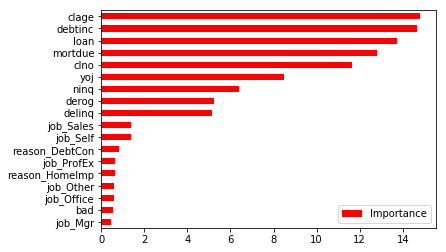

In [40]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")

Gradient Boosting

In [3]:
data = pd.read_csv('hmelq.csv')
df=data.copy()
data_ = df.dropna() #remove all null columns' rows in dataset
dms = pd.get_dummies(data_[["reason","job"]])
y=data_["value"]
X_=data_.drop(["value","reason","job"], axis=1).astype("float64")
X=pd.concat([X_,dms[["reason_DebtCon","reason_HomeImp","job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)
from sklearn.metrics import accuracy_score 
y_pred=gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
gbm_model

In [ ]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05], "n_estimators":[100,500,1000], "max_depth":[3,5,10],"min_samples_split":[2,5,10]}
from sklearn.model_selection import GridSearchCV
gbm=GradientBoostingClassifier()
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10, n_jobs=-1, verbose=5)
gbm_cv.fit(X_train,y_train)

In [ ]:
print("En iyi parametreler"+ str(gbm_cv.best_params_))

In [ ]:
gbm=GradientBoostingClassifier(learning_rate= 0.01, max_depth=5, min_samples_split= 2, n_estimators= 500)
gbm_tuned=gbm.fit(X_train, y_train)
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))